In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

from wire_analysis.beamshape import (integrate_H_on_plane_1D,
                                      integrate_H_on_plane_1D_etaW
                                     )
from wire_analysis.beamshape import  (integrate_H_angles)

from wire_analysis.beamfit import Beamfit

#plot Options
import matplotlib as mpl
font = {#'family' : 'normal','weight' : 'bold',
        'size'   : 16
        #,'serif':['Helvetica']
        }
mpl.rc('font', **font)

degree = np.pi/180

#### Plot Fraction in the central 20% as function of l_eff


In [3]:
l_eff_list = np.logspace(-2,5,num = 40)
fraction_list = [integrate_H_on_plane_1D(l_eff = leff,x_lims = [-10,10],
                     z_lims = [-2.5e-3,2.5e-3]) for leff in l_eff_list]

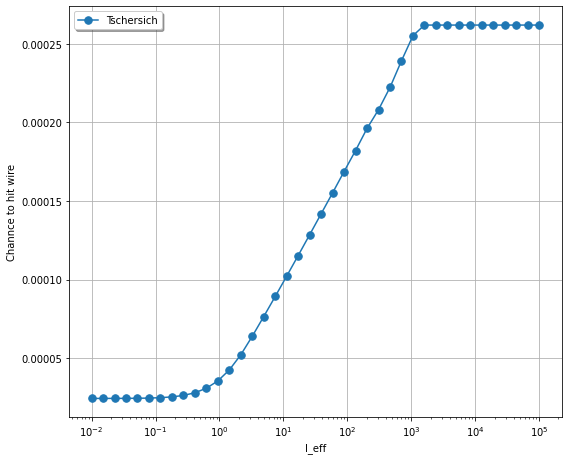

In [4]:
fig = plt.figure(0, figsize=(8,6.5))
ax1=plt.gca()

# ax1.plot(l_eff_list , fraction_cos_list, ".", ls = "-",label = "Lambert Cos",
#          ms = 15)
ax1.plot(l_eff_list , np.array(fraction_list),
          ".", ls = "-",label = "Tschersich",
         ms = 15)
# ax1.plot(l_eff_list , np.array(fraction_old_1D_list),
#           ".", ls = "-",label = "Tschersich_old_1D",
#          ms = 15)

# ax1.axhline(1, label =  "1", color = "k")
# ax1.set_ylim([0,1])
ax1.set_xscale('log')
# ax1.set_yscale('log')
ax1.set_xlabel(r"l_eff")
ax1.set_ylabel(r"Channce to hit wire")

plt.legend(shadow=True)
plt.tight_layout()
plt.grid(True)

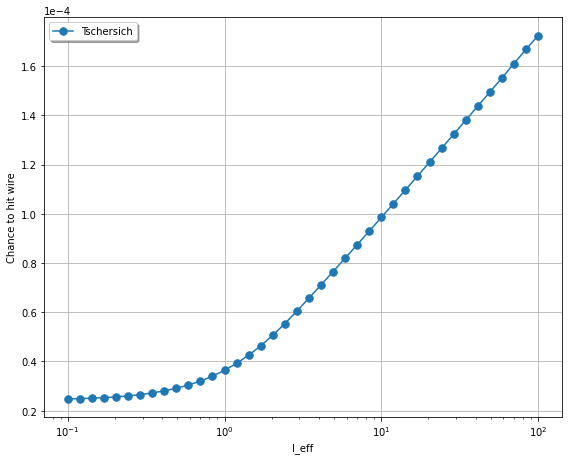

In [5]:
l_eff_list = np.logspace(-1,2,num = 40)
fraction_list = [integrate_H_on_plane_1D(l_eff = leff,x_lims = [-10,10],
                     z_lims = [-2.5e-3,2.5e-3]) for leff in l_eff_list]
# fraction_cos_list= [integrate_H_angles_cos(theta_lim = [0,20*degree] 
#                                            )/integrate_H_angles_cos(
#     theta_lim = [0,90*degree] ) for leff in l_eff_list]
fig = plt.figure(0, figsize=(8,6.5))
ax1=plt.gca()

# ax1.plot(l_eff_list , fraction_cos_list, ".", ls = "-",label = "Lambert Cos",
#          ms = 15)
ax1.plot(l_eff_list , np.array(fraction_list),
          ".", ls = "-",label = "Tschersich",
         ms = 15)
# ax1.plot(l_eff_list , np.array(fraction_old_1D_list),
#           ".", ls = "-",label = "Tschersich_old_1D",
#          ms = 15)

# ax1.axhline(1, label =  "1", color = "k")
# ax1.set_ylim([0,1])
# 

ax1.set_xscale('log')
ax1.set_xlabel(r"l_eff")
ax1.set_ylabel(r"Chance to hit wire")

plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

plt.legend(shadow=True)
plt.tight_layout()
plt.grid(True)

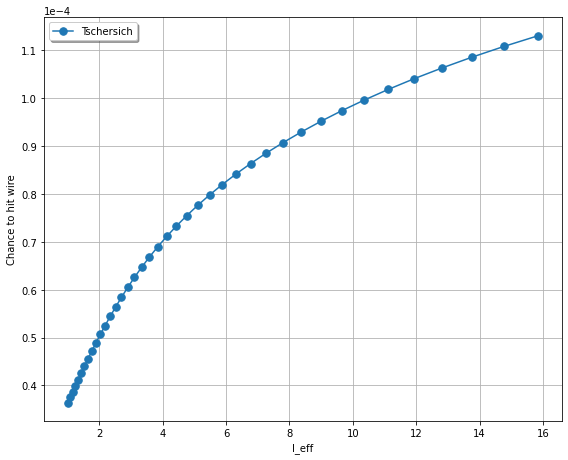

In [6]:
l_eff_list = np.logspace(0,1.2,num = 40)
fraction_list = [integrate_H_on_plane_1D(l_eff = leff,x_lims = [-10,10],
                     z_lims = [-2.5e-3,2.5e-3]) for leff in l_eff_list]
# fraction_cos_list= [integrate_H_angles_cos(theta_lim = [0,20*degree] 
#                                            )/integrate_H_angles_cos(
#     theta_lim = [0,90*degree] ) for leff in l_eff_list]
fig = plt.figure(0, figsize=(8,6.5))
ax1=plt.gca()

# ax1.plot(l_eff_list , fraction_cos_list, ".", ls = "-",label = "Lambert Cos",
#          ms = 15)
ax1.plot(l_eff_list , np.array(fraction_list),
          ".", ls = "-",label = "Tschersich",
         ms = 15)
# ax1.plot(l_eff_list , np.array(fraction_old_1D_list),
#           ".", ls = "-",label = "Tschersich_old_1D",
#          ms = 15)

# ax1.axhline(1, label =  "1", color = "k")
# ax1.set_ylim([0,1])
# 

# ax1.set_xscale('log')
ax1.set_xlabel(r"l_eff")
ax1.set_ylabel(r"Chance to hit wire")

plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

plt.legend(shadow=True)
plt.tight_layout()
plt.grid(True)

#### Calculate correction factor due to wire seinsitivity

In [4]:
l_eff = 4
# fraction of atoms that hit the wire at 1sccm 
f = integrate_H_on_plane_1D(l_eff = l_eff,x_lims = [-10,10],
                     z_lims = [-2.5e-3,2.5e-3])
print(f)
#Calculate fraction weighted by wire sensitivity
f_eta = integrate_H_on_plane_1D_etaW(l_eff = l_eff,x_lims = [-10,10],
                     z_lims = [-2.5e-3,2.5e-3])
print(f_eta)
f_eta/f

7.01949139595329e-05
5.318334239608102e-05


0.7576523624879861

In [5]:
l_eff = 7.28
# fraction of atoms that hit the wire at 1sccm 
f = integrate_H_on_plane_1D(l_eff = l_eff,x_lims = [-10,10],
                     z_lims = [-2.5e-3,2.5e-3])
print(f)
#Calculate fraction weighted by wire sensitivity
f_eta = integrate_H_on_plane_1D_etaW(l_eff = l_eff,x_lims = [-10,10],
                     z_lims = [-2.5e-3,2.5e-3])
print(f_eta)
f_eta/f

8.860096261770148e-05
7.09270767595273e-05


0.8005226429149075

Is eta_W properly normalized for this purpose?

 i don't think so. integration without etaW implicitly assimes etaw = 1 everywhere. This has normalization 1, wheras the used eta_W is less than 1 everywhere but the center. This was never an issue for th efits function, because we always fit a scale factor.

 In fact the calculation above is equivalemt to " eta_wire_H_weighted" calculated in wire_analysis/accomodation_coefficient.py", which is the average eta_wire as seen/weighted by the  beam profile (eta_w seen by the average H atom)

 TODO: calculate the average of eta_W -> compare to average when weighted. BEam weighred number will be bigger


 
 

In [9]:
#HACKITY HACK HACK
from wire_analysis.beamfit import Beamfit
eta_wire = Beamfit(run_dict_path=(  
    "C:\\Users\\Christian\\Documents\\StudiumPhD\\python\\wire_analysis"
    + "\\scripts\\2023-12-18_no_cracking_H2\\run_dicts\\1sccm_390TC.json"
                    )).eta_wire_default
x_lims = [-10,10]
err = 1e-2
integrant = lambda x:(eta_wire(x) # weight by wire sensitivity
                            )
result, err = integrate.quad(integrant,
                                x_lims[0], x_lims[1], # x boundaries
                                epsabs=err,epsrel= err,
                                )
avg_eta = result/(x_lims[1] - x_lims[0])
print("avg_eta = ", avg_eta)
norm_factor_eta = 1/avg_eta
print("norm_factor_eta = ", norm_factor_eta)

avg_eta =  0.6803843766408546
norm_factor_eta =  1.469757440547252


TODO should use this value to normalize eta_W

#### define function for calculating dissooc. lower limit

In [14]:
def dissoc_lower_limit(n_sccm, p_H, l_eff):
    """
    Caculate the minimum atom fraction required to explain recombination heating

    Parameters
    ----------
    n_sccm :  `int`
        gas flow in sccm
    p_H_wire : `float`
        Diameter of the wire in meters
    l_eff : `float`
        effective length of capilary Tscherscih  definition
    """
    #### , 100% rec
    gamma_H =1
    ac_H = 1

    # Energy per atom:
    E_rec = 7.1511 * 10**-19 # Joules (per molecule)
    E_H =  gamma_H * ac_H * (E_rec / 2) 


    # HACK hardcoded: (should really be calculated as part of calibration)
    norm_factor_eta = 1.469757440547252
    # fraction of atoms that hit the wire at 1sccm, 
    # weighted by wire sensitivity
    f = norm_factor_eta * integrate_H_on_plane_1D_etaW(
                        l_eff = l_eff,x_lims = [-10,10],
                        z_lims = [-2.5e-3,2.5e-3])


    #Power due to H in center of beam: (rough)
    p_H = p_H
    # flow of H in total beam
    phi_H = (p_H * (1/f)) / E_H
    print("atom flow estimate:", phi_H, "atoms/s")
    # Calc dissociation fraction, Fraction of molecules that dissociate
    sccm = 4.478 * 10**17
    phi_H2 = n_sccm  * sccm
    alpha_diss = (phi_H/2)/phi_H2
    print("dissociation fraction lower limit:", alpha_diss)
    return alpha_diss

In [15]:
n_sccm = 0.2
p_H = 0.55 * 1e-6
l_eff = 6.62
# Rerun all 3 flows: 
print("1sccm:")
dissoc_lower_limit(n_sccm = 1, p_H = 0.85 * 1e-6 , l_eff = 4.00)
print("0.2sccm:")
dissoc_lower_limit(n_sccm = 0.2, p_H = 0.55 * 1e-6 , l_eff = 6.62)
print("0.05sccm:")
dissoc_lower_limit(n_sccm = 0.05, p_H = 0.23 * 1e-6 , l_eff = 7.28)

1sccm:
atom flow estimate: 3.0412685781254016e+16 atoms/s
dissociation fraction lower limit: 0.03395788943864897
0.2sccm:
atom flow estimate: 1.5385761282672034e+16 atoms/s
dissociation fraction lower limit: 0.08589638947449774
0.05sccm:
atom flow estimate: 6170597972664208.0 atoms/s
dissociation fraction lower limit: 0.13779807888933024


0.13779807888933024

### (OLD unnormalized eta) Calculate 1sccm approximate dissoc fraction (assuming unrealistic 100% recomb)

In [7]:
# 1sccm, 100% rec
# Energy per atom:
E_rec = 7.1511 * 10**-19 # Joules
gamma_H =1
ac_H = 1
E_H =  gamma_H * ac_H * (E_rec / 2) 

# fraction of atoms that hit the wire at 1sccm 
f = integrate_H_on_plane_1D(l_eff = 4,x_lims = [-10,10],
                     z_lims = [-2.5e-3,2.5e-3])


#Power due to H in center of beam: (rough)
p_H = 0.85 * 1e-6
# flow of H in total beam
phi_H = p_H / E_H * (1/f)
print("atom flow estimate:", phi_H, "atoms/s")
# Calc dissociation fraction, Fraction of molecules that dissociate
sccm = 4.478 * 10**17
phi_H2 = 1 * sccm
alpha_diss = (phi_H/2)/phi_H2
print("dissociation fraction lower limit:", alpha_diss)

atom flow estimate: 3.3866508436796292e+16 atoms/s
dissociation fraction lower limit: 0.03781432384635584


In [8]:
# 1sccm, paper rec values
# Energy per atom:
E_rec = 7.1511 * 10**-19 # Joules
gamma_H = 0.03
ac_H = 0.65
E_H =  gamma_H * ac_H * (E_rec / 2) 

# fraction of atoms that hit the wire at 1sccm 
f = integrate_H_on_plane_1D(l_eff = 4,x_lims = [-10,10],
                     z_lims = [-2.5e-3,2.5e-3])


#Power due to H in center of beam: (rough)
p_H = 0.85 * 1e-6
# flow of H in total beam
phi_H = p_H / E_H * (1/f)
print("atom flow estimate:", phi_H, "atoms/s")
# Calc dissociation fraction, Fraction of molecules that dissociate
sccm = 4.478 * 10**17
phi_H2 = 1 * sccm
alpha_diss = (phi_H/2)/phi_H2
print("dissociation fraction lit recomb:", alpha_diss)

atom flow estimate: 1.73674402239981e+18 atoms/s
dissociation fraction lit recomb: 1.9391960946849152


#### 0.05 sccm

In [10]:
# 0.05sccm, 100% rec
n_sccm = 0.05
p_H = 0.23 * 1e-6
# Energy per atom:
E_rec = 7.1511 * 10**-19 # Joules
gamma_H =1
ac_H = 1
E_H =  gamma_H * ac_H * (E_rec / 2) 

# fraction of atoms that hit the wire at 1sccm 
f = integrate_H_on_plane_1D(l_eff = 7.28,x_lims = [-10,10],
                     z_lims = [-2.5e-3,2.5e-3])


#Power due to H in center of beam: (rough)
p_H = p_H
# flow of H in total beam
phi_H = p_H / E_H * (1/f)
print("atom flow estimate:", phi_H, "atoms/s")
# Calc dissociation fraction, Fraction of molecules that dissociate
sccm = 4.478 * 10**17
phi_H2 = 0.05 * sccm
alpha_diss = (phi_H/2)/phi_H2
print("dissociation fraction lower limit:", alpha_diss)

atom flow estimate: 7260165822487687.0 atoms/s
dissociation fraction lower limit: 0.16212965213237354


#### 0.2sccm

In [12]:
# 0.2sccm, 100% rec
n_sccm = 0.2
p_H = 0.55 * 1e-6
l_eff = 6.62
# Energy per atom:
E_rec = 7.1511 * 10**-19 # Joules
gamma_H =1
ac_H = 1
E_H =  gamma_H * ac_H * (E_rec / 2) 

# fraction of atoms that hit the wire at 1sccm 
f = integrate_H_on_plane_1D(l_eff = l_eff,x_lims = [-10,10],
                     z_lims = [-2.5e-3,2.5e-3])


#Power due to H in center of beam: (rough)
p_H = p_H
# flow of H in total beam
phi_H = p_H / E_H * (1/f)
print("atom flow estimate:", phi_H, "atoms/s")
# Calc dissociation fraction, Fraction of molecules that dissociate
sccm = 4.478 * 10**17
phi_H2 = n_sccm  * sccm
alpha_diss = (phi_H/2)/phi_H2
print("dissociation fraction lower limit:", alpha_diss)

atom flow estimate: 1.7958983650554388e+16 atoms/s
dissociation fraction lower limit: 0.10026230264936573
